In [27]:
import pandas as pd
from sklearn.utils import resample

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('skyserver.csv')
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


- objid: Identificação do objeto.
- ra e dec: Ascensão reta e declinação, respectivamente. Estas são coordenadas que indicam a posição de um objeto no céu.
- u, g, r, i, z: São as magnitudes (brilho) do objeto em diferentes faixas de comprimento de onda.
- run, rerun, camcol, field: São identificadores específicos da pesquisa e da imagem da qual os dados foram extraídos.
- specobjid: Identificação do objeto no espectro.
- class: Classe do objeto (pode ser estrela, galáxia ou quasar).
- redshift: Indica a quantidade que a luz de um objeto foi deslocada para o vermelho. Pode ser usado para estimar a distância do objeto.
- plate, mjd, fiberid: Relacionados à placa usada para observar o objeto.

In [6]:
#check missing values
missing_values = data.isnull().sum()
missing_values

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [7]:
#Basic summary statistics
statistical_description = data.describe()
statistical_description

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,0.000000e+00,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [8]:
# class distribution
class_distribution = data['class'].value_counts()
class_distribution

class
GALAXY    4998
STAR      4152
QSO        850
Name: count, dtype: int64

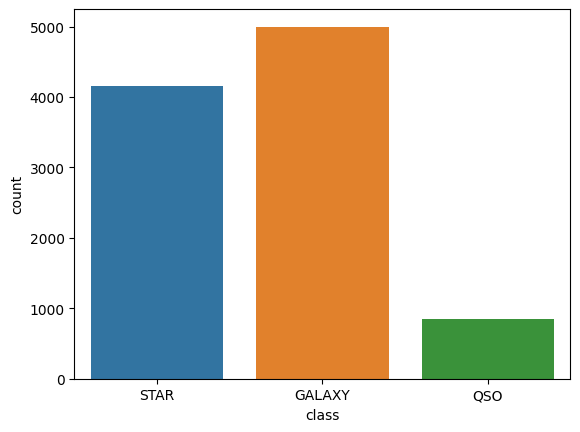

In [18]:
sns.countplot(x=data['class']);

**Agora, vamos visualizar a distribuição espacial dos objetos celestes utilizando as coordenadas RA (ascensão reta) e DEC (declinação).**

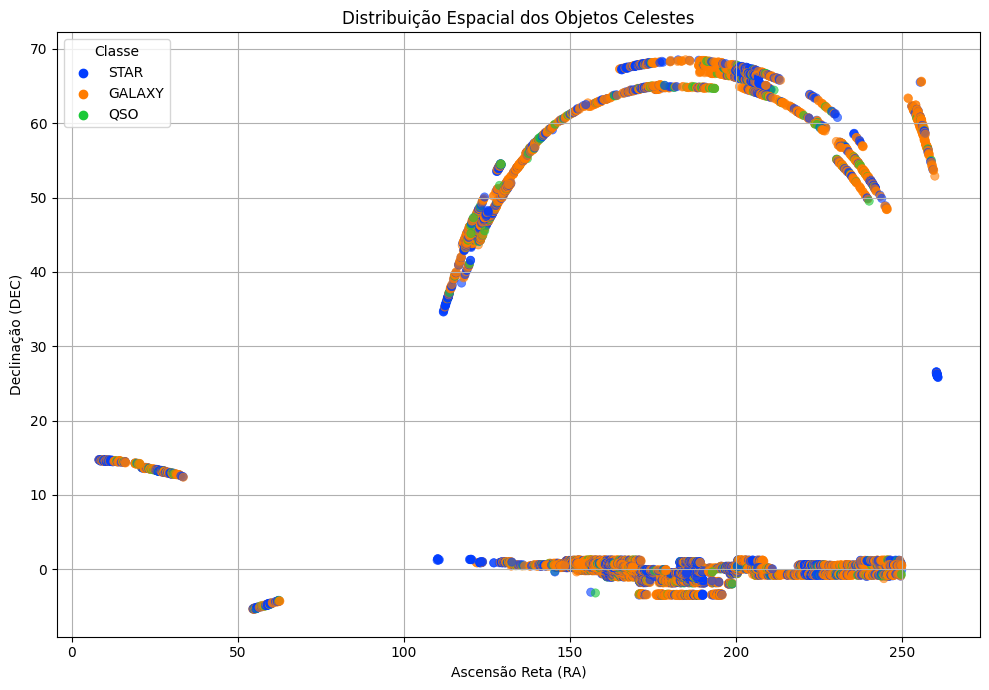

In [50]:
# Configurações para o plot
plt.figure(figsize=(10, 7))
sns.scatterplot(x=data['ra'], y=data['dec'], hue=data['class'], palette='bright', alpha=0.6, edgecolor=None)
plt.title('Distribuição Espacial dos Objetos Celestes')
plt.xlabel('Ascensão Reta (RA)')
plt.ylabel('Declinação (DEC)')
plt.legend(title='Classe')
plt.grid(True)
plt.tight_layout()
plt.show()

Aqui está a distribuição espacial dos objetos celestes utilizando as coordenadas RA (ascensão reta) e DEC (declinação). Cada ponto no gráfico representa um objeto celeste, e a cor indica sua classe (galáxia, estrela ou quasar).  
- A distribuição de estrelas e galáxias parece ser bastante uniforme em todo o espaço observado.
- Os quasares, embora menos numerosos, também são visíveis e estão espalhados pelo espaço.  

Esse tipo de visualização ajuda a entender como os diferentes tipos de objetos celestes estão distribuídos no céu.

### Distribuição das magnitudes

As magnitudes u,g,r,i,z são medidas do brilho dos objetos celestes em diferentes faixas de comprimento de onda. Em astronomia, a magnitude é uma escala logarítmica, onde objetos mais brilhantes têm valores menores e objetos mais fracos têm valores maiores.

Para entender a distribuição das cores, podemos criar novas variáveis, que são simplesmente a diferença entre as magnitudes. Por exemplo, u−g ou 
g−r representam a cor do objeto em uma faixa particular do espectro.

Vamos fazer o seguinte:

Visualizar a distribuição das magnitudes u,g,r,i,z usando histogramas ou gráficos KDE.
Criar algumas variáveis de cor e visualizar sua distribuição.

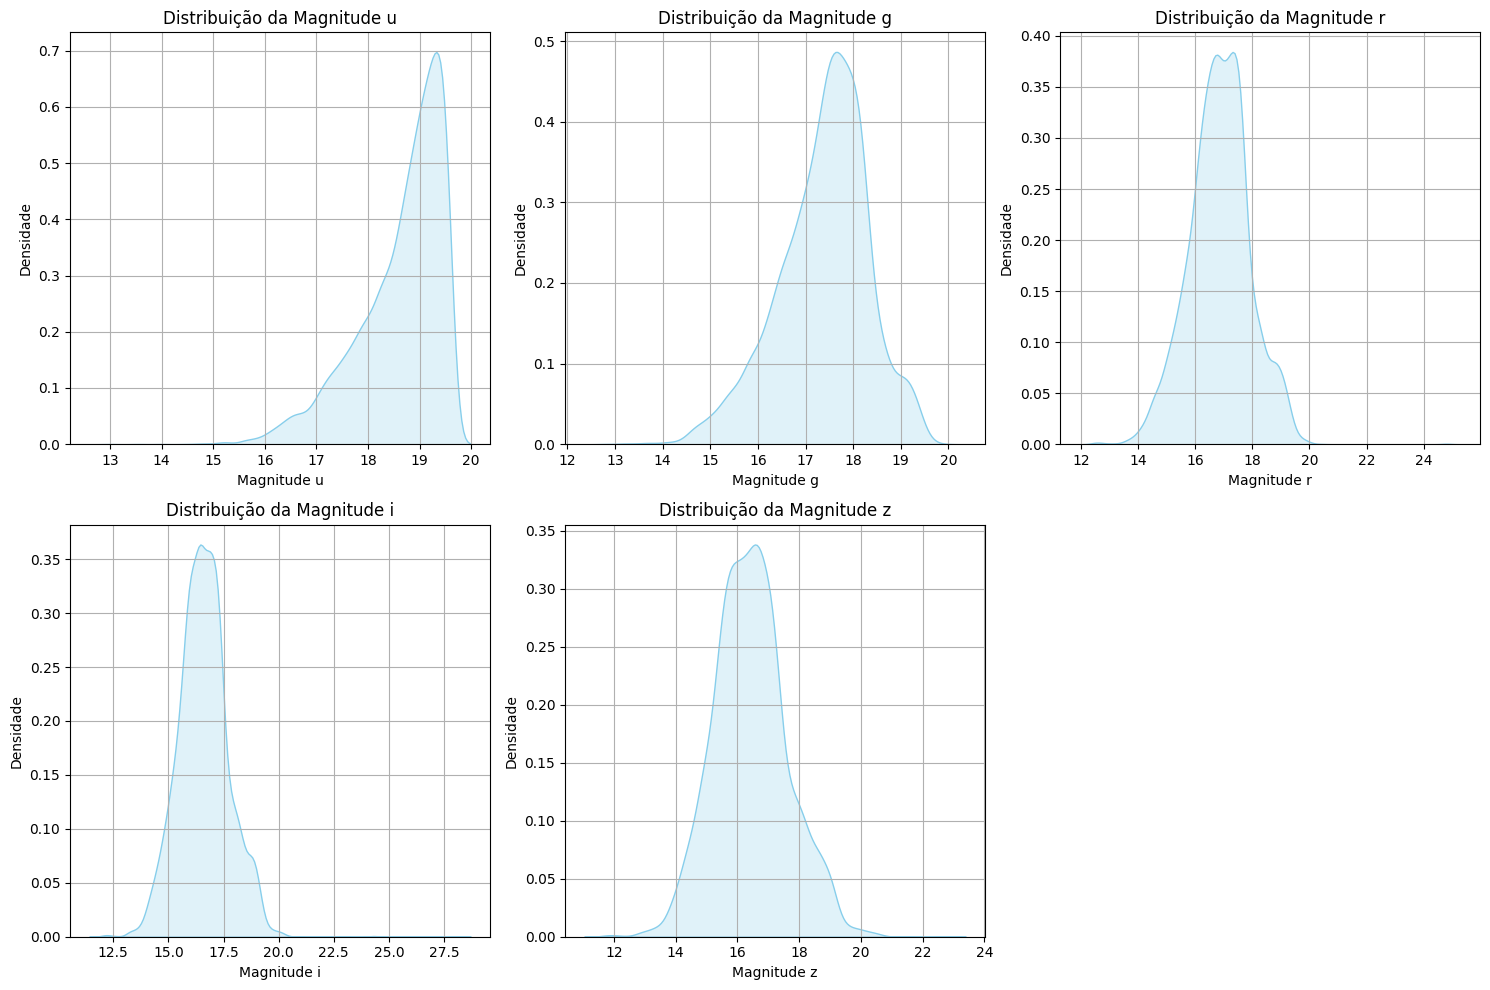

In [13]:
# distribuição das magnitudes
# Configurações para os plots
plt.figure(figsize=(15, 10))

# Plots para as magnitudes u, g, r, i, z
magnitudes = ['u', 'g', 'r', 'i', 'z']
for idx, mag in enumerate(magnitudes, 1):
    plt.subplot(2, 3, idx)
    sns.kdeplot(data[mag], shade=True, color='skyblue')
    plt.title(f'Distribuição da Magnitude {mag}')
    plt.xlabel(f'Magnitude {mag}')
    plt.ylabel('Densidade')
    plt.grid(True)

plt.tight_layout()
plt.show()


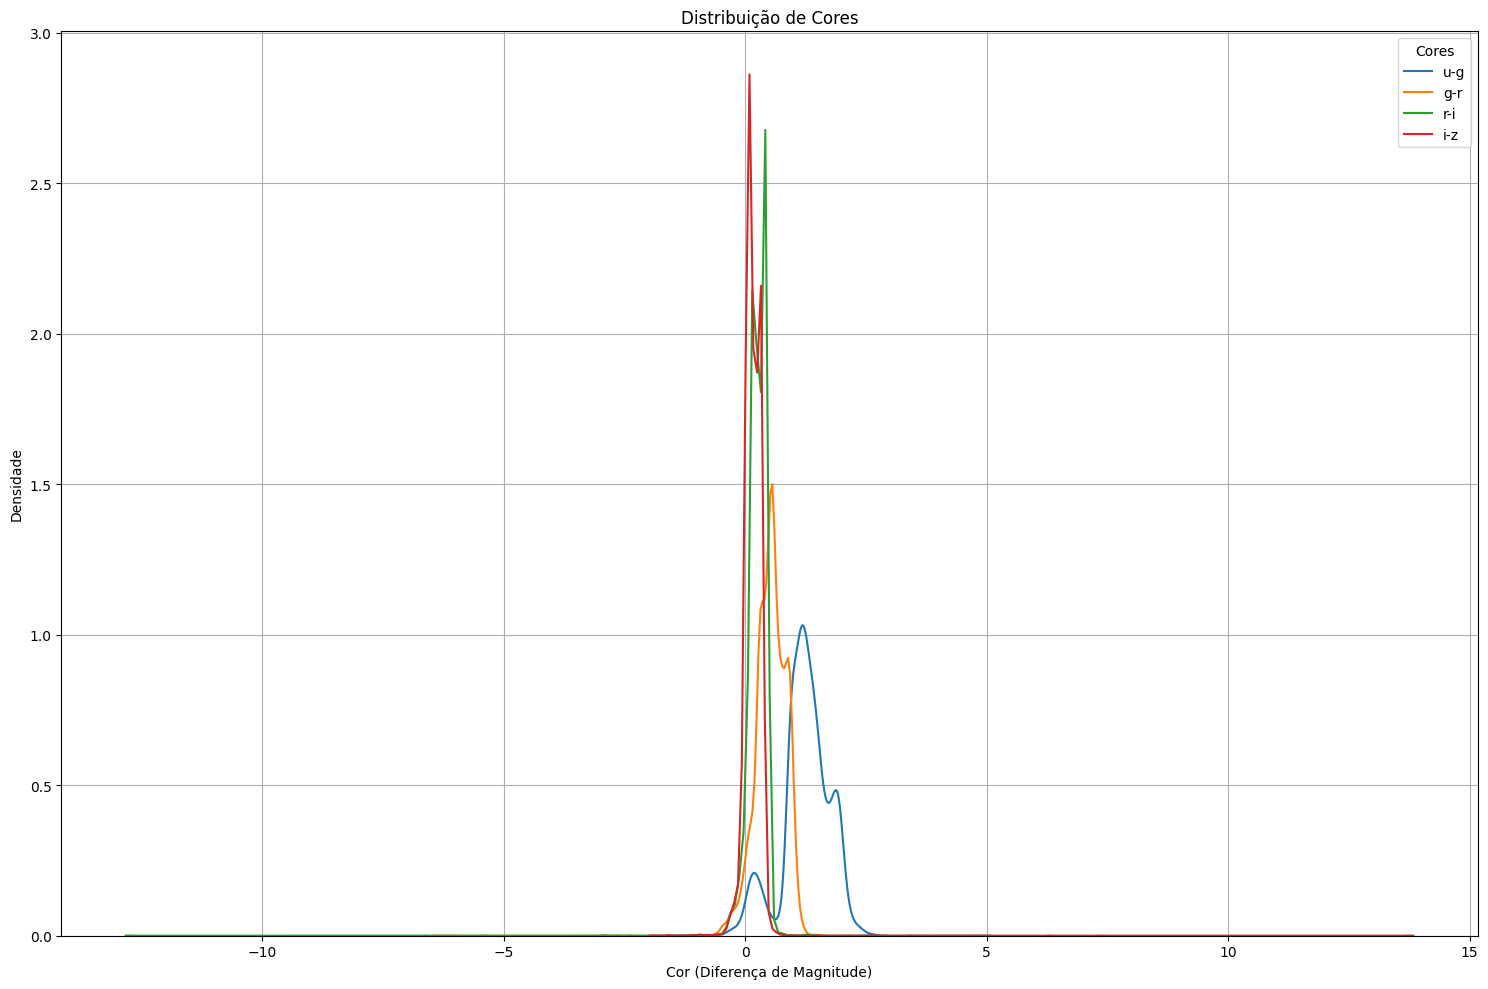

In [14]:
# Configuração da visualização
plt.figure(figsize=(15, 10))

# Cores (diferenças entre magnitudes)
colors = ['u-g', 'g-r', 'r-i', 'i-z']

# Plotando as distribuições de cores
for c in colors:
    sns.kdeplot(data[c.split('-')[0]] - data[c.split('-')[1]], label=c)

plt.title('Distribuição de Cores')
plt.xlabel('Cor (Diferença de Magnitude)')
plt.ylabel('Densidade')
plt.legend(title='Cores')
plt.grid(True)
plt.tight_layout()
plt.show()

### Comparação das Propriedades Médias

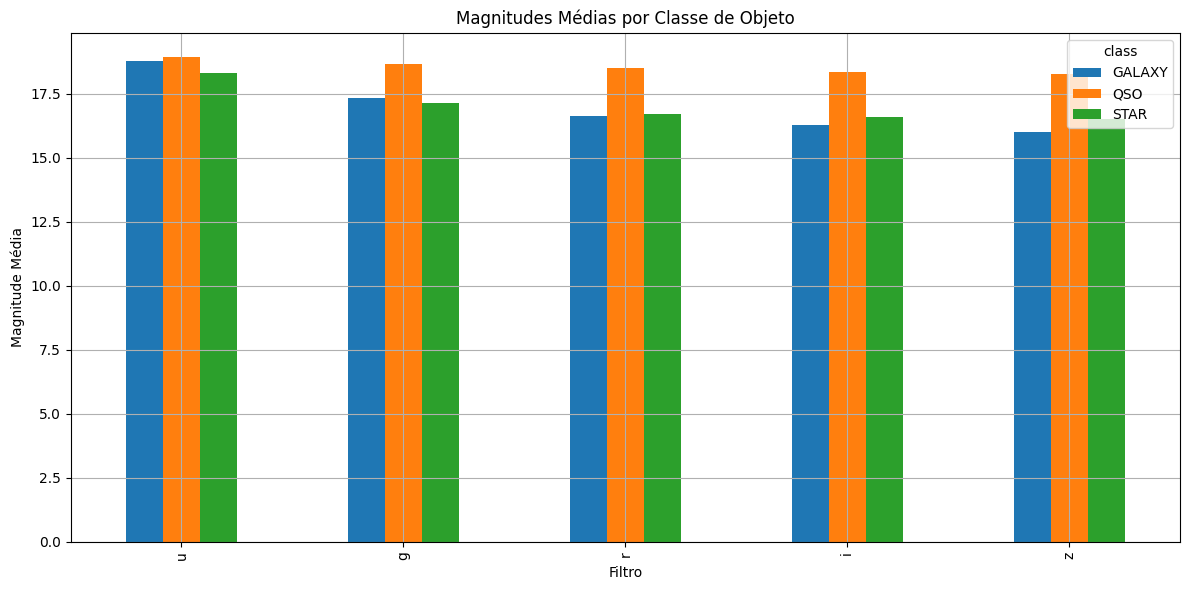

In [15]:
# Calcule as magnitudes médias para cada classe de objeto
mean_magnitudes = data.groupby('class')[['u', 'g', 'r', 'i', 'z']].mean()

# Plot
mean_magnitudes.T.plot(kind='bar', figsize=(12, 6))
plt.title('Magnitudes Médias por Classe de Objeto')
plt.ylabel('Magnitude Média')
plt.xlabel('Filtro')
plt.grid(True)
plt.tight_layout()
plt.show()

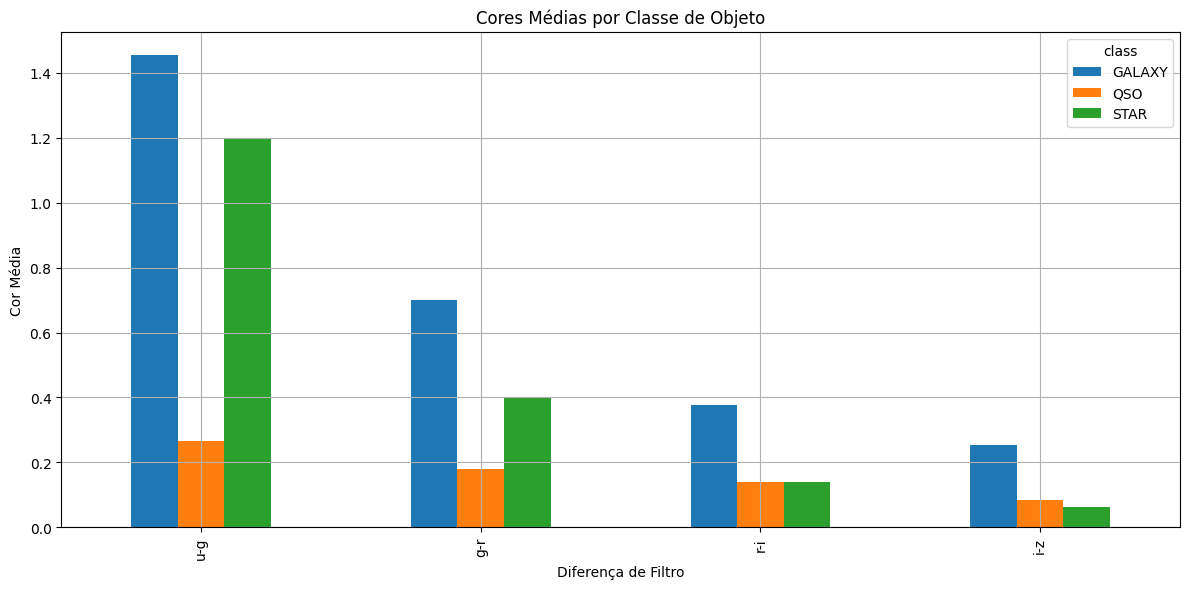

In [16]:
# Calcule as cores médias
mean_colors = pd.DataFrame()
mean_colors['u-g'] = mean_magnitudes['u'] - mean_magnitudes['g']
mean_colors['g-r'] = mean_magnitudes['g'] - mean_magnitudes['r']
mean_colors['r-i'] = mean_magnitudes['r'] - mean_magnitudes['i']
mean_colors['i-z'] = mean_magnitudes['i'] - mean_magnitudes['z']

# Plot
mean_colors.T.plot(kind='bar', figsize=(12, 6))
plt.title('Cores Médias por Classe de Objeto')
plt.ylabel('Cor Média')
plt.xlabel('Diferença de Filtro')
plt.grid(True)
plt.tight_layout()
plt.show()


### Relação entre cada tipo de corpo celeste e redshift

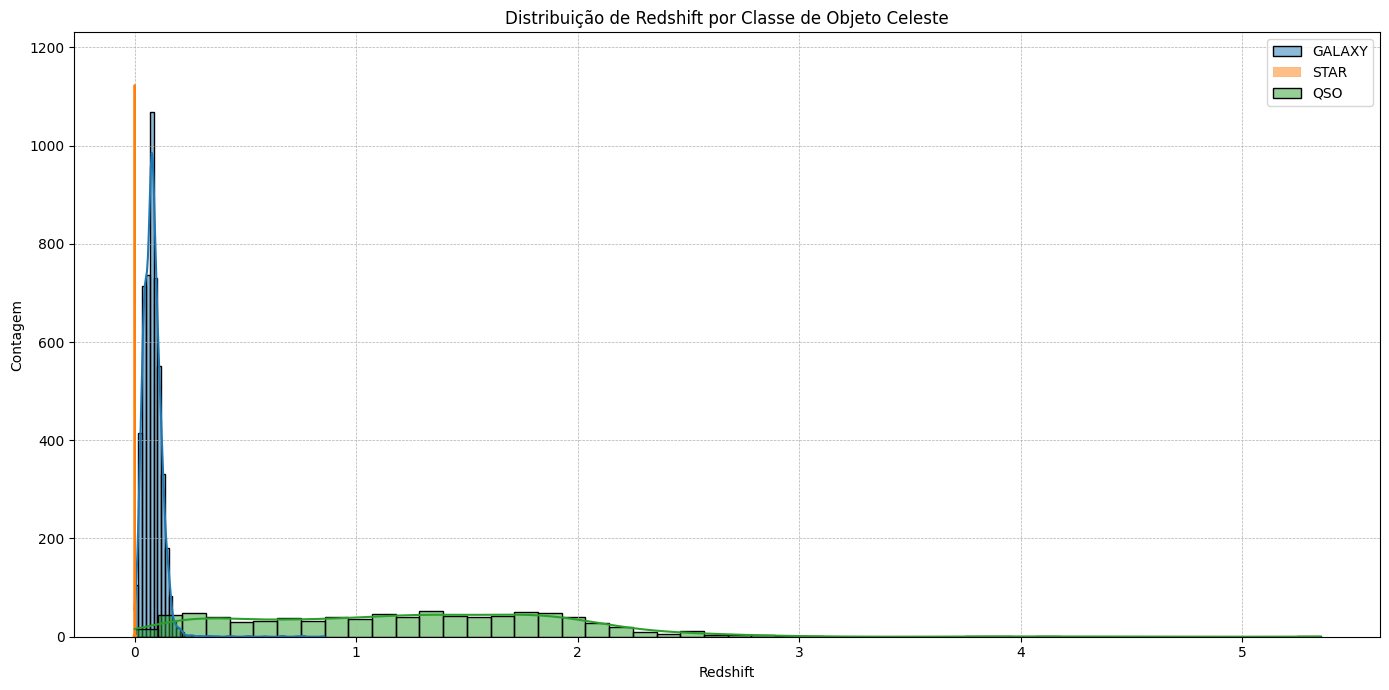

In [19]:
# Set up the figure and axis
plt.figure(figsize=(14, 7))

# Plot histograms for each class
for celestial_object in ['GALAXY', 'STAR', 'QSO']:
    subset = data[data['class'] == celestial_object]
    sns.histplot(subset['redshift'], label=celestial_object, kde=True, bins=50, alpha=0.5)

# Set up labels, title, and legend
plt.title('Distribuição de Redshift por Classe de Objeto Celeste')
plt.xlabel('Redshift')
plt.ylabel('Contagem')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

### Análise de Correlação

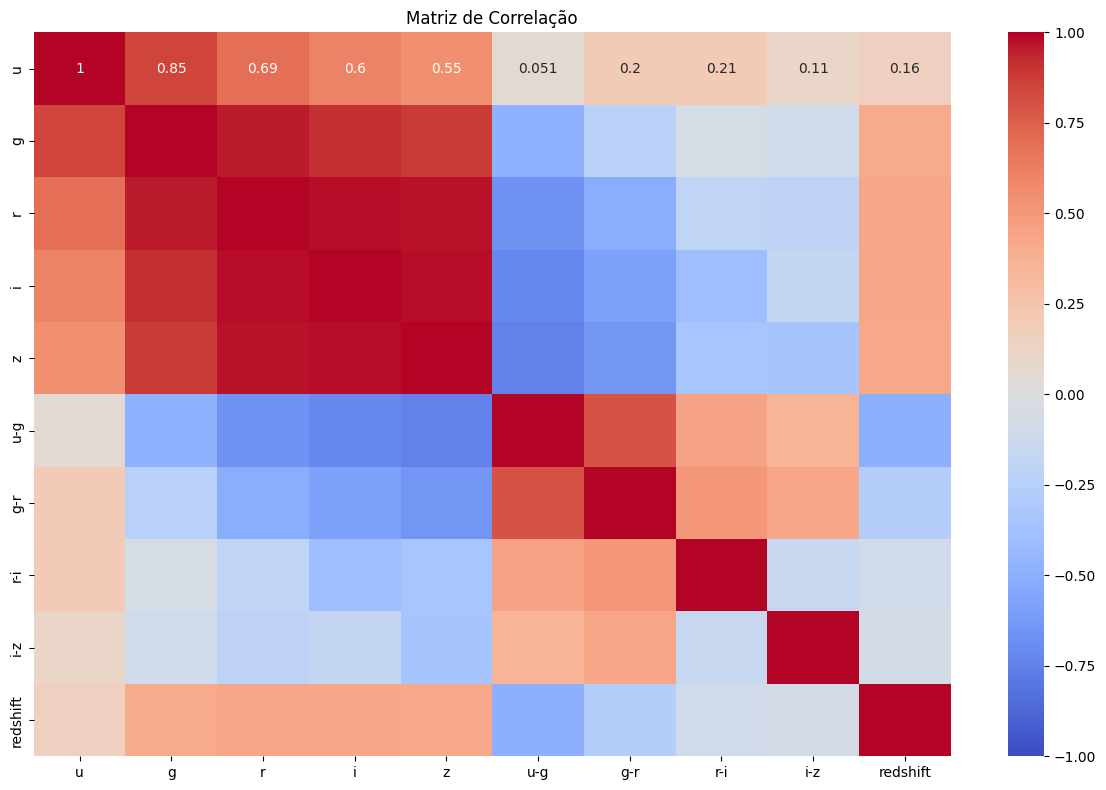

In [20]:
# Calculate color columns
data['u-g'] = data['u'] - data['g']
data['g-r'] = data['g'] - data['r']
data['r-i'] = data['r'] - data['i']
data['i-z'] = data['i'] - data['z']

# Select relevant columns for correlation analysis
selected_columns = ['u', 'g', 'r', 'i', 'z', 'u-g', 'g-r', 'r-i', 'i-z', 'redshift']

# Compute the correlation matrix
correlation_matrix = data[selected_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matriz de Correlação")
plt.tight_layout()
plt.show()


Observações principais:

Magnitudes e Redshift: Todas as magnitudes (u, g, r, i, z) têm uma correlação positiva com o redshift, embora a força da correlação varie. Isso sugere que, em média, objetos com redshifts mais altos (ou seja, objetos mais distantes) tendem a ser menos brilhantes em todas as bandas. Isso fmaz sentido, pois objetos mais distantes geralmente aparecem menos brilhantes para nós.

Diferenças de Cor e Redshift: As cores u−g e g−r têm correlação positiva com o redshift, enquanto
r−i e i−z têm uma correlação ligeiramente negativa. Isso sugere que objetos com redshifts mais altos tendem a ser mais "azuis" em u-g e g-r, mas mais "vermelhos" em r-i e i-z.

Diferenças de Cor entre si: As cores são fortemente correlacionadas entre si. Por exemplo, u−g e g−r têm uma correlação forte e positiva, o que sugere que objetos que são "azuis" em u-g também tendem a ser "azuis" em g-r.

Esta análise nos dá insights sobre como as características dos objetos celestes estão relacionadas entre si. Em particular, a relação entre redshift e cor pode ser útil para estudos cosmológicos, pois fornece informações sobre a evolução das estrelas e galáxias ao longo do tempo.

### Análise de Outliers

In [22]:
# Define columns to check for outliers
columns_to_check = ['u', 'g', 'r', 'i', 'z', 'u-g', 'g-r', 'r-i', 'i-z']

# Dictionary to store outliers information for each column
outliers_info = {}

# Detect outliers for each column
for column in columns_to_check:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    outliers_info[column] = {
        'Lower_Bound': lower_bound,
        'Upper_Bound': upper_bound,
        'Num_Outliers': outliers.shape[0]
    }

# Convert the dictionary to a dataframe for better visualization
outliers_df = pd.DataFrame(outliers_info).T
outliers_df


,Lower_Bound,Upper_Bound,Num_Outliers
u,16.556239,20.881029,264.0
g,15.022533,19.802713,163.0
r,14.164319,19.521689,102.0
i,13.746437,19.365817,114.0
z,13.333541,19.426191,123.0
u-g,0.180661,2.387691,528.0
g-r,-0.283342,1.378417,134.0
r-i,-0.220860,0.773800,166.0
i-z,-0.284965,0.626375,107.0


- As colunas de magnitude (u, g, r, i, z) têm um número moderado de outliers. Isso é esperado, pois embora a maioria dos objetos celestes tenha magnitudes dentro de um intervalo típico, sempre haverá alguns objetos que são excepcionalmente brilhantes ou fracos.

- As colunas de diferenças de cor (u-g, g-r, r-i, i-z) também apresentam outliers. A coluna u−g tem o maior número de outliers. Estas diferenças de cor podem ser influenciadas por vários fatores, incluindo a temperatura, idade e composição do objeto.

- Dado que estamos trabalhando com dados astronômicos, é importante notar que nem todos os outliers são necessariamente "erros" ou "ruído". Em muitos casos, os outliers podem representar objetos astronômicos raros ou incomuns que são de interesse científico.

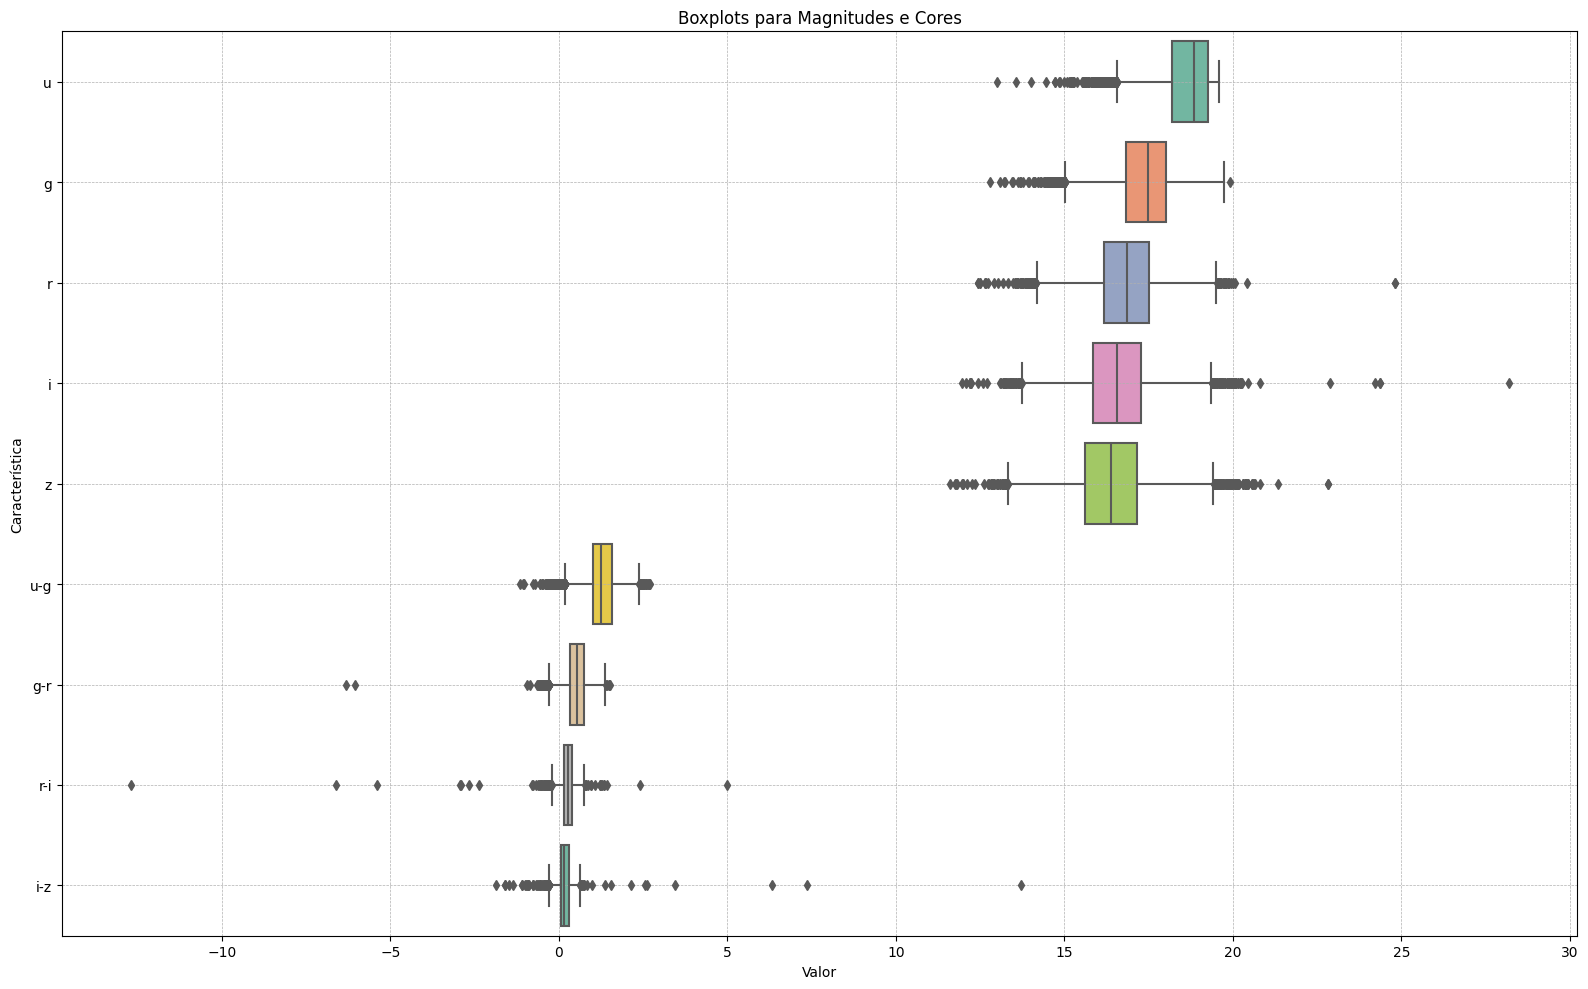

In [23]:
# Plot boxplots for each column to visualize the outliers
plt.figure(figsize=(16, 10))

# Boxplots for magnitudes and colors
sns.boxplot(data=data[columns_to_check], orient="h", palette="Set2")
plt.title("Boxplots para Magnitudes e Cores")
plt.xlabel("Valor")
plt.ylabel("Característica")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

As magnitudes u e g têm vários outliers no lado superior (mais brilhante).
As diferenças de cor u−g, g−r, r−i e i−z também apresentam outliers, especialmente no lado superior.

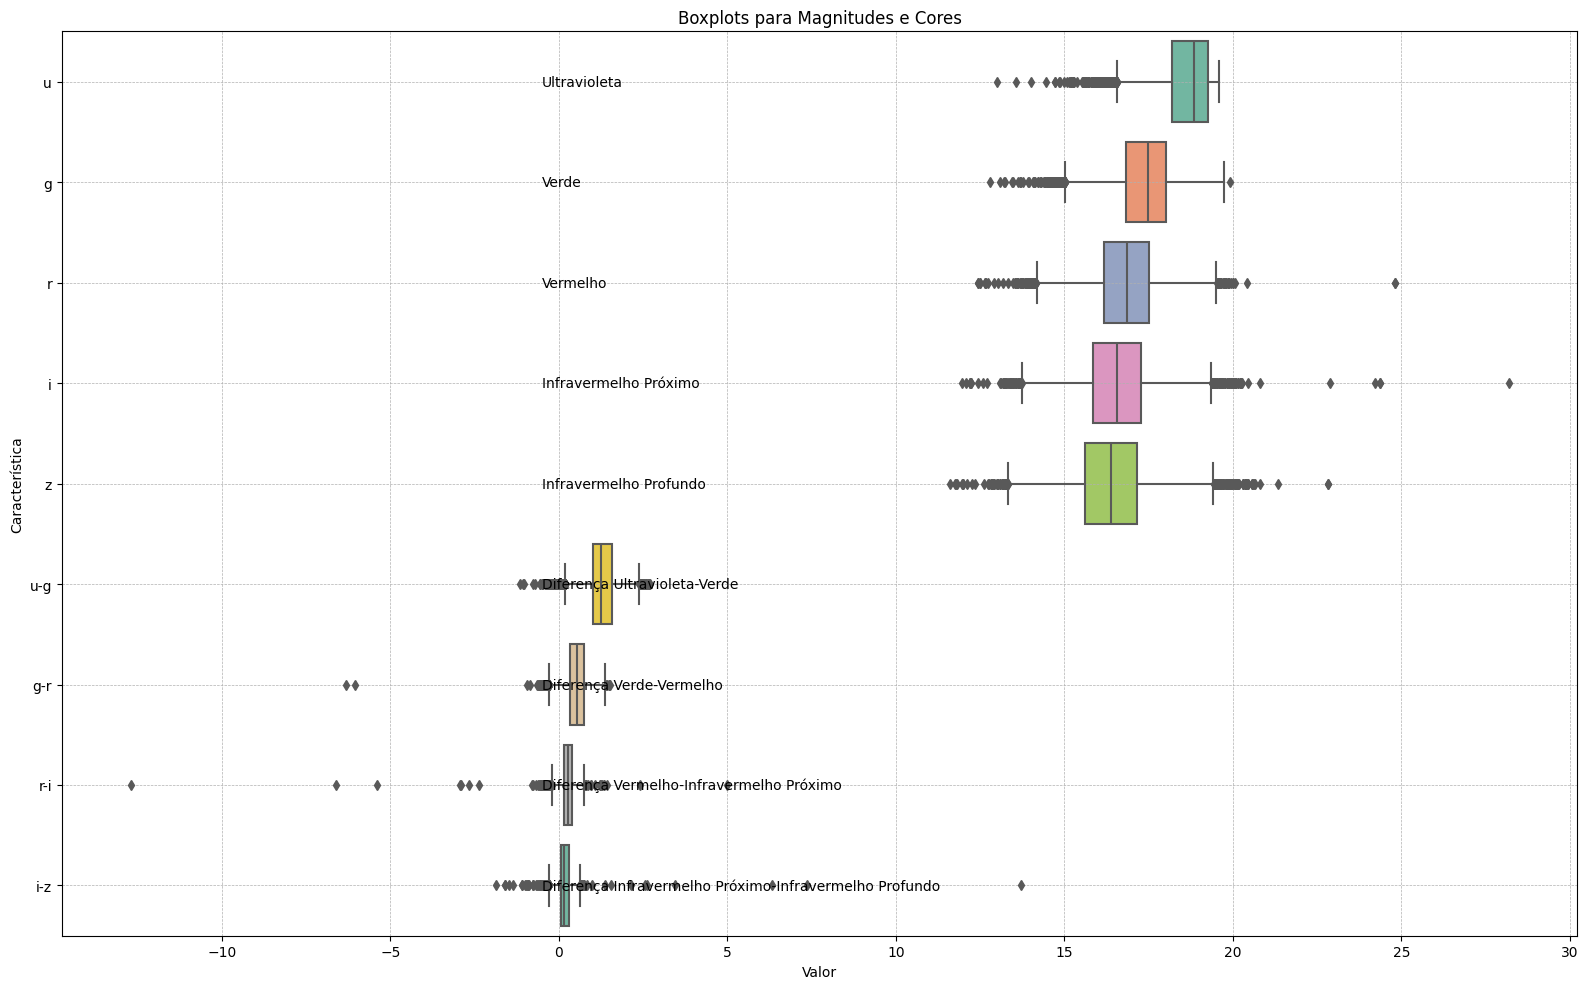

In [24]:
# Plot boxplots with labels for each column to visualize the outliers
plt.figure(figsize=(16, 10))

# Boxplots for magnitudes and colors
sns.boxplot(data=data[columns_to_check], orient="h", palette="Set2")

# Adding labels to explain the bands
band_labels = {
    'u': 'Ultravioleta',
    'g': 'Verde',
    'r': 'Vermelho',
    'i': 'Infravermelho Próximo',
    'z': 'Infravermelho Profundo',
    'u-g': 'Diferença Ultravioleta-Verde',
    'g-r': 'Diferença Verde-Vermelho',
    'r-i': 'Diferença Vermelho-Infravermelho Próximo',
    'i-z': 'Diferença Infravermelho Próximo-Infravermelho Profundo'
}

# Annotate each box with the corresponding band label
for i, column in enumerate(columns_to_check):
    plt.text(-0.5, i, band_labels[column], fontsize=10, verticalalignment='center', color='black')

plt.title("Boxplots para Magnitudes e Cores")
plt.xlabel("Valor")
plt.ylabel("Característica")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


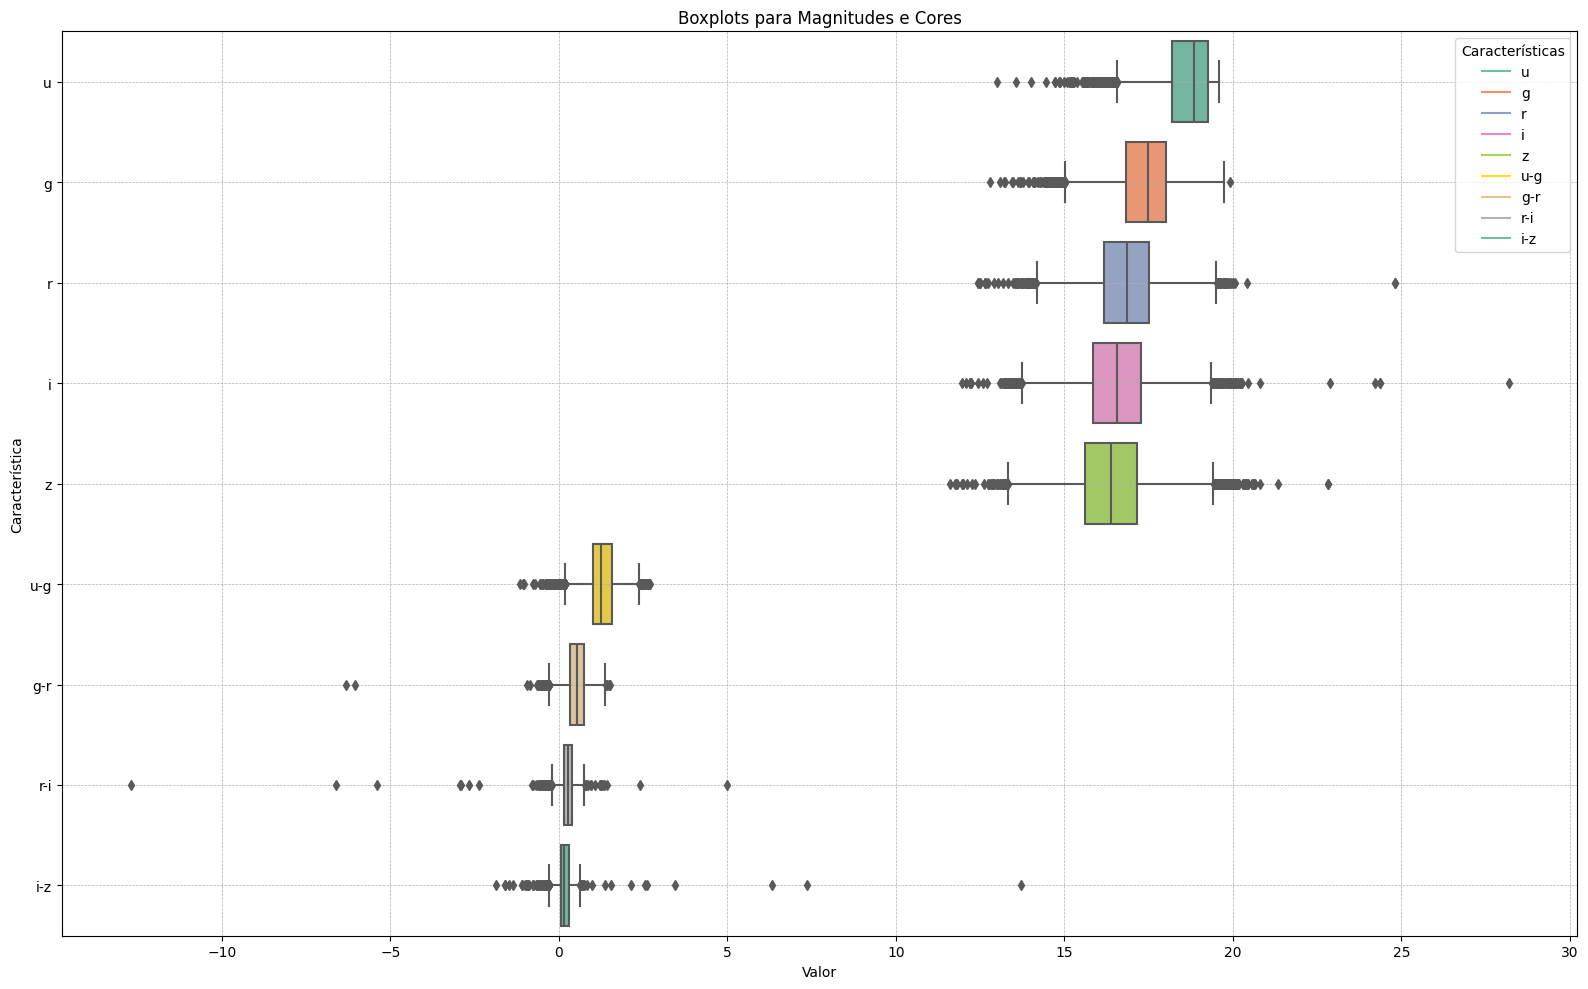

In [25]:
# Plot boxplots with legend for each column to visualize the outliers
plt.figure(figsize=(16, 10))

# Create a color palette to use for the legend
palette = sns.color_palette("Set2", len(columns_to_check))

# Boxplots for magnitudes and colors with legend
sns.boxplot(data=data[columns_to_check], orient="h", palette=palette)

# Create a legend manually using the same color palette
patches = [plt.Line2D([0], [0], color=palette[i], label=columns_to_check[i]) for i in range(len(columns_to_check))]
plt.legend(handles=patches, title="Características", loc='upper right')

# Set title and labels
plt.title("Boxplots para Magnitudes e Cores")
plt.xlabel("Valor")
plt.ylabel("Característica")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


## PreProcessing and feature engineering

- remove outliers
- normalize features

In [30]:
# 1. Eliminate outliers based on previously calculated bounds
for column, bounds in outliers_df.iterrows():
    data = data[(data[column] >= bounds['Lower_Bound']) & (data[column] <= bounds['Upper_Bound'])]

# 2. Normalize the features using Min-Max scaling
from sklearn.preprocessing import MinMaxScaler

# Features for the model
features = ['u', 'g', 'r', 'i', 'z', 'u-g', 'g-r', 'r-i', 'i-z', 'redshift']
X = data[features]
y = data['class']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Check the first few rows of the scaled features
pd.DataFrame(X_scaled, columns=features).head()


,u,g,r,i,z,u-g,g-r,r-i,i-z,redshift
0,0.692050,0.499083,0.483187,0.489519,0.500239,0.573970,0.530535,0.412247,0.419866,0.001352
1,0.928716,0.722644,0.637617,0.596990,0.569706,0.457362,0.647204,0.618396,0.629932,0.042157
2,0.397134,0.359123,0.383472,0.398437,0.417656,0.444364,0.467701,0.403663,0.397816,0.001334
3,0.326444,0.281499,0.437186,0.501324,0.537835,0.500708,0.066315,0.099242,0.245812,0.001566
4,0.944605,0.785809,0.771205,0.763637,0.779979,0.354034,0.377719,0.373670,0.280989,0.001475


### Oversampling


In [31]:
# Check the distribution of classes
class_distribution = y.value_counts(normalize=True)
class_distribution


class
GALAXY    0.536746
STAR      0.410194
QSO       0.053059
Name: proportion, dtype: float64

- Galáxias: 53.67%
- Estrelas: 41.02%
- Quasares (QSO): 5.31%

Claramente, os quasares são a classe minoritária, representando apenas cerca de 5,31% do conjunto de dados.

Agora, em relação ao balanceamento:

Oversampling: Isso envolve o aumento da classe minoritária (neste caso, quasares) para que ela tenha o mesmo número de observações que a classe majoritária. O método SMOTE é uma técnica popular para isso.
Undersampling: Isso envolve a redução das classes majoritárias para que elas tenham o mesmo número de observações que a classe minoritária.
Dado que os quasares são apenas 5,31% do conjunto de dados, o undersampling pode resultar em uma grande perda de dados. Por outro lado, o oversampling pode levar a um modelo que é muito sensível aos quasares, já que ele estará vendo muitas instâncias "sintéticas" desse tipo.

Para este caso, eu recomendaria oversampling usando o método SMOTE. Ele cria observações sintéticas da classe minoritária ao invés de simplesmente replicar as existentes, tornando o modelo mais robusto.

In [29]:
!pip install -U imbalanced-learn

                                              0.0/235.6 kB ? eta -:--:--
     ------                                   41.0/235.6 kB ? eta -:--:--
     -------------------                    122.9/235.6 kB 3.5 MB/s eta 0:00:01
     ----------------------------           174.1/235.6 kB 2.6 MB/s eta 0:00:01
     -------------------------------------- 235.6/235.6 kB 1.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
from sklearn.utils import resample

# Separate the classes
X_star = X_scaled[y == 'STAR']
X_galaxy = X_scaled[y == 'GALAXY']
X_qso = X_scaled[y == 'QSO']

y_star = y[y == 'STAR']
y_galaxy = y[y == 'GALAXY']
y_qso = y[y == 'QSO']

# Upsample the QSO class
X_qso_upsampled, y_qso_upsampled = resample(X_qso, y_qso, 
                                           replace=True, 
                                           n_samples=len(X_galaxy), 
                                           random_state=42)

# Combine the upsampled QSO class with the other classes
X_upsampled = np.vstack((X_star, X_galaxy, X_qso_upsampled))
y_upsampled = np.hstack((y_star, y_galaxy, y_qso_upsampled))

# Check the distribution of classes after upsampling
upsampled_class_distribution = pd.Series(y_upsampled).value_counts(normalize=True)
upsampled_class_distribution


NameError: name 'X_scaled' is not defined

In [35]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Check the distribution of classes after SMOTE
resampled_class_distribution = pd.Series(y_resampled).value_counts(normalize=True)
resampled_class_distribution


class
STAR      0.333333
GALAXY    0.333333
QSO       0.333333
Name: proportion, dtype: float64

In [37]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Check the shape of the training and test data
X_train.shape, X_test.shape


((11726, 10), (2932, 10))

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, digits=6)

accuracy, classification_rep


(0.992837653478854,
 '              precision    recall  f1-score   support\n\n      GALAXY   0.991770  0.986694  0.989225       977\n         QSO   0.989796  0.992835  0.991313       977\n        STAR   0.996939  0.998978  0.997957       978\n\n    accuracy                       0.992838      2932\n   macro avg   0.992835  0.992836  0.992832      2932\nweighted avg   0.992836  0.992838  0.992834      2932\n')

In [39]:
classification_rep

'              precision    recall  f1-score   support\n\n      GALAXY       0.99      0.99      0.99       977\n         QSO       0.99      0.99      0.99       977\n        STAR       1.00      1.00      1.00       978\n\n    accuracy                           0.99      2932\n   macro avg       0.99      0.99      0.99      2932\nweighted avg       0.99      0.99      0.99      2932\n'

## Modelo sem Oversampling

In [44]:
# Load the original data again
data_original = pd.read_csv('skyserver.csv')

# Calculate color columns (differences between magnitudes)
data_original['u-g'] = data_original['u'] - data_original['g']
data_original['g-r'] = data_original['g'] - data_original['r']
data_original['r-i'] = data_original['r'] - data_original['i']
data_original['i-z'] = data_original['i'] - data_original['z']

# 1. Eliminate outliers based on previously calculated bounds
data_no_outliers = data_original.copy()
for column, bounds in outliers_df.iterrows():
    data_no_outliers = data_no_outliers[(data_no_outliers[column] >= bounds['Lower_Bound']) & (data_no_outliers[column] <= bounds['Upper_Bound'])]

# 2. Normalize the features using Min-Max scaling
X_no_outliers = data_no_outliers[features]
y_no_outliers = data_no_outliers['class']
X_scaled_no_outliers = scaler.fit_transform(X_no_outliers)

# Split the data into training and test sets
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(X_scaled_no_outliers, y_no_outliers, 
                                                                                                test_size=0.2, random_state=42, stratify=y_no_outliers)

# Train the Random Forest model
rf_model_no_outliers = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)

# Predict on the test set
y_pred_no_outliers = rf_model_no_outliers.predict(X_test_no_outliers)

# Evaluate the model
accuracy_no_outliers = accuracy_score(y_test_no_outliers, y_pred_no_outliers)
classification_rep_no_outliers = classification_report(y_test_no_outliers, y_pred_no_outliers, digits=6)

accuracy_no_outliers, classification_rep_no_outliers


(0.9901153212520593,
 '              precision    recall  f1-score   support\n\n      GALAXY   0.990788  0.990788  0.990788       977\n         QSO   0.936170  0.907216  0.921466        97\n        STAR   0.996000  1.000000  0.997996       747\n\n    accuracy                       0.990115      1821\n   macro avg   0.974319  0.966002  0.970083      1821\nweighted avg   0.990017  0.990115  0.990052      1821\n')

In [ ]:
Accuracy: 0.990115
Galáxias:
    Precision: 0.990788
    Recall: 0.990788
    f1-score: 0.990788
Quasares:
    Precision: 0.936170
    Recall: 0.907216
    f1-score: 0.921466
Estrelas:
    Precision: 0.996000
    Recall: 1.000000
    f1-score: 0.997996
    